<font color='red'>$\Huge{\textbf{School of Computational Techniques}}$
$\Huge{\textbf{for Physics Students in Kenya}}$

$\Huge{\text{Introduction to Statistical Data Analysis}}$

Christina Agapopoulou,
Kiplabat Tarus

# **First lecture: Introduction to statistics for data analysis**

---


On the program today:
* How to work with large data-sets
* Data exploration
* Filtering data
* Some basic concepts of statistics



# Preparation

---

Hello! Before we dive into the world of statistics, let's prepare a bit our data-sets. We will be working with a data-set from a real-life physics experiment: this is the LHCb experiment, located at CERN, Geneva which explores the fundamental interactions of sub-atomic particles, and in particular the b-quark. The b-quark can be found in baryons or mesons for very short times after a particle collision, such as those produced at the Large Hadron Collider, at CERN. These mesons or baryons are very unstable and quickly decay, either in one, or more steps, to stable particles: u- , d-quarks and electrons. We measure the decay products of the b-quarks, and by using conservation laws, try to figure out what happened during the collision. Decay products, depending on their nature, as well as our detecting material can leave different signatures in our detectors: we have tracks, energy clusters, Cherenkov rings and more!

The aim of this specific data-set is to measure the $C\!P$ asymmetry in $B^0_{(s)}$ meson decays, i.e. the different decay rates of the charge-conjugated decays $B^0_{(s)} \to K^+ \pi^-$ and $\overline{B^0}_{(s)} \to K^- \pi^+$.

First we need to mount our google drive to collab.

In [2]:
# Check if the current environment is Google Colab
RunningInCOLAB = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False

if RunningInCOLAB:
    # Import the Google Drive library
    from google.colab import drive
    # Mount the Google Drive to the Colab environment
    drive.mount('/content/drive')
else:
    # Print a message if the environment is not Google Colab
    print("You are not in Google Colab, make sure to have ROOT installed")

Mounted at /content/drive


---
You will be prompted to connect to your Googe Drive - you should accept. If the procedure succeeds, you'll get the message `Mounted at /content/drive`.
Now your Google Drive is accessible like a normal directory on you PC, and we can use it as a container for our data.

We also need to use a dedicated library called `uproot` to extract the data in a readable format for python. The first time we will need to install it, it may take a couple of minutes.

---

In [3]:
# Install uproot

!pip install uproot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.3/351.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.1/796.1 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 692.8/692.8 kB 27.4 MB/s eta 0:00:00




---

Now let's load our data and start inspecting them! For this first step, we will use Pandas DataFrames, a python library for data analysis.

---



In [4]:
# Define the paths to the data and MC files based on whether the environment is Google Colab
path_to_files = "/content/drive/MyDrive/"

data_file = path_to_files + "data.root"
mc_file = path_to_files + "mc.root"

# Import the necessary libraries
import uproot
import pandas as pd
import numpy as np

# Define the name of the tree
tree_name = "ntp"

# Open the data file and access the tree
data_tree = uproot.open(data_file)[tree_name]

# Get the names of the branches
# the keys of the tree (branches) are the names of the variables that our data-set contains!
vars = data_tree.keys()
print(vars)

# Convert the data tree into a pandas DataFrame
df_lhcb_data = data_tree.arrays(data_tree.keys(),library="pd")

#let's look at one of them
var = ['minPT']
print(df_lhcb_data[var])

print(" ")
print("Number of variables in our data-set: ", len(vars))
print("Number of values in our variable array: ", len(df_lhcb_data[var]))
print(" ")

#let's look at a few others:
vars = ['minPT', 'piplusPT', 'minIPCHI2']
print(df_lhcb_data[vars])

# Open the MC file and access the tree
mc_tree = uproot.open(mc_file)[tree_name]
# Convert the MC tree into a pandas DataFrame using the same branches as the data tree
df_lhcb_mc = mc_tree.arrays(data_tree.keys(),library="pd")


['minPT', 'minIP', 'minIPCHI2', 'maxPT', 'maxIP', 'maxIPCHI2', 'doca', 'vertexCHI2', 'bPT', 'bIP', 'bIPCHI2', 'bFD', 'bFDCHI2', 'bP', 'bETA', 'bPHI', 'piplusP', 'piplusPT', 'piplusETA', 'piplusPHI', 'piminusP', 'piminusPT', 'piminusETA', 'piminusPHI', 'piplusDLLKPI', 'piplusDLLPPI', 'piminusDLLKPI', 'piminusDLLPPI', 'mass', 'tag']
           minPT
0       4.427628
1       2.911383
2       1.195873
3       2.672241
4       1.618954
...          ...
535083  1.704376
535084  2.762654
535085  2.723498
535086  1.737258
535087  2.033011

[535088 rows x 1 columns]
 
Number of variables in our data-set:  30
Number of values in our variable array:  535088
 
           minPT  piplusPT   minIPCHI2
0       4.427628  4.470922  781.796997
1       2.911383  3.292401  900.156494
2       1.195873  1.195873    5.402138
3       2.672241  2.672241  538.320251
4       1.618954  3.571917  369.565796
...          ...       ...         ...
535083  1.704376  5.878604  125.938553
535084  2.762654  2.762654   29





---
Let's quickly explaining the meaning of the variables in our data-set

*   `P`: the momentum of the particle, $P = \sqrt{P_x^2 + P_y^2 + P_z^2}$
*   `PT`: transverse momentum of the particle, $P_T = \sqrt{P_x^2+P_y^2}$
*   `IP`: Impact Parameter, minimum distance of the track from the vertex where the $pp$ interaction takes place
*   `IPCHI2`: the $\chi^2$ of the impact parameter
*   `ETA`: pseudorapidity of the particle, defined as $\eta = - \log \left[ \tan \left( \frac{\theta}{2} \right) \right]$ where $\theta$ is the angle between the flight direction and the `z` axis (polar angle)
*   `PHI`: azimuthal angle of the particle, the angle netween the flight direction of the particle and the `x` axis
*   `FD`: Flight Distance, the flight distance of the particle before decaying (in mm)
*   `FDCHI2`: $\chi^2$ of the flight distance
*   `DLLKPI`: Delta-Log Likelihood ($K-\pi$); this variable quantifies the probability for the particle being a $K$ and not a $\pi$
*   `DLLPPI`: Delta-Log Likelihood ($K-\pi$); this variable quantifies the probability for the particle being a $p$ and not a $\pi$
*   `doca`: Distance Of Closest Approach, the minimum distance between our two tracks
*   `vertexCHI2`: $\chi^2$ of the vertex position
*   `min` and `max` refer to the final tracks; for example, `minPT` is the minimum transverse momentum among the $K$ and $\pi$


---



### **The big data era**

We often hear the phrase "big data", but what does it mean?

When we talk about big data, we usually refer to massive data-sets, that are analyzed to reveal patterns, trends and associations. But why do we need such large data-sets ?  

Because of rarity, randomness and uncertainty - all related to statistics! Big-data analysis inevitably means statistical treatment of the data - **you cannot have big-data without statistics!**

Computational resources, both hardware but also time, is not for free, so a fast code is a good code. Python contains various libraries to perform efficient data analysis and visualisation, and we will be using a vary popular one, called NumPy.

---

NumPy, short for Numerical Python, is a powerful library for scientific computing in Python. It provides support for arrays, matrices, and many mathematical functions to operate on these data structures efficiently. We will briefly show some key functionalities of the library, as we will be using it a lot in this course. You can always find more information in the [official documentation website](https://numpy.org/doc/).

---

#### 1. Importing NumPy
First, you need to import the NumPy library. The convention is to import it as `np`:

In [ ]:
import numpy as np

#### 2. Creating Arrays
**From Lists**

You can create NumPy arrays from Python lists:

In [ ]:
# 1D array
arr1 = np.array([1, 2, 3, 4, 5])
print(arr1)

# 2D array
arr2 = np.array([[1, 2, 3], [4, 5, 6]])
print(arr2)


[1 2 3 4 5]
[[1 2 3]
 [4 5 6]]




---

Or by using **Built-in functions**

NumPy provides several functions to create arrays:

---



In [ ]:
# Array of zeros
zeros = np.zeros((2, 3))
print(zeros)

# Array of ones
ones = np.ones((2, 3))
print(ones)

# Array of random numbers
randoms = np.random.random((2, 3))
print(randoms)

# Array with a range of numbers
range_array = np.arange(10)
print(range_array)

# Array with a range of numbers with a specific step
step_array = np.arange(0, 10, 2)
print(step_array)

# Array with evenly spaced numbers over a specified interval
linspace_array = np.linspace(0, 1, 5)
print(linspace_array)


[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]
[[0.34216352 0.05427675 0.59040259]
 [0.68714799 0.25731664 0.79985469]]
[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[0.   0.25 0.5  0.75 1.  ]


#### 3. Array Properties
You can get information about the shape, size, and type of the array:


---



In [ ]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

print("Shape:", arr.shape)
print("Size:", arr.size)
print("Data type:", arr.dtype)


Shape: (2, 3)
Size: 6
Data type: int64


#### 4. Indexing and Slicing
You can access elements, subarrays, and modify parts of arrays using indexing and slicing:


---



In [ ]:
arr = np.array([1, 2, 3, 4, 5])

# Indexing
print(arr[0])
print(arr[4])

# Slicing
print(arr[1:3])
print(arr[:3])
print(arr[::2])

# Modifying elements
arr[0] = 10
print(arr)


1
5
[2 3]
[1 2 3]
[1 3 5]
[10  2  3  4  5]




---

For 2D arrays:

---





In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6]])

# Indexing
print(arr2d[0, 0])
print(arr2d[1, 2])

# Slicing
print(arr2d[:, 1])
print(arr2d[1, :])

1
6
[2 5]
[4 5 6]


#### 4. Aggregate Functions
NumPy provides many functions to compute aggregates:

In [ ]:
arr = np.array([1, 2, 3, 4, 5])

print("Sum:", np.sum(arr))
print("Mean:", np.mean(arr))
print("Standard Deviation:", np.std(arr))
print("Maximum:", np.max(arr))
print("Minimum:", np.min(arr))




---

For 2D arrays

---



In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6]])

print("Sum (all elements):", np.sum(arr2d))
print("Sum (columns):", np.sum(arr2d, axis=0))
print("Sum (rows):", np.sum(arr2d, axis=1))


#### 5. Random Numbers
NumPy has powerful random number generation capabilities:

In [ ]:
# Random integers
rand_ints = np.random.randint(0, 10, size=(3, 1))
print(rand_ints)

rand_ints = np.random.randint(8, 10)
print(rand_ints)

# Random floats
rand_floats = np.random.rand(3, 1)
print(rand_floats)

# Random numbers from a normal distribution
rand_norm = np.random.randn(3, 3)
print(rand_norm)


[[2]
 [1]
 [6]]
8
[[0.24327429]
 [0.83529719]
 [0.16733589]]
[[ 0.37237488  0.41839449  1.64584033]
 [-1.65025671 -1.13627956  0.32664272]
 [-0.33112514 -0.47475451 -2.93603063]]


#### 6. Understanding its computing power

We could do all these things with usual python functions, why use NumPy? Let's see a simple example on how much difference in CPU time spent we can have even only looking at python:

In [ ]:
import time

start = time.perf_counter()
list_ = [[num + 1 for num in range(5)] for lst in range(1000000)]
elapsed = time.perf_counter() - start
print(f"{elapsed:0.3f}s = native python list initialization")

start = time.perf_counter()
array = np.full((1000000,5), range(1,5+1))
elapsed = time.perf_counter() - start
print(f"{elapsed:0.3f}s = numpy list initialization for shape {array.shape}")

start = time.perf_counter()
count = 0
sum   = 0
for lst in list_:
    for num in lst:
        count += 1
        sum   += num
elapsed = time.perf_counter() - start
print(f"{elapsed:0.3f}s = native python list to sum {count} elements = {sum}")

start = time.perf_counter()
count = array.size
sum   = np.sum(array)
elapsed = time.perf_counter() - start
print(f"{elapsed:0.3f}s = numpy array to sum {count} elements = {sum}")

2.029s = native python list initialization
0.043s = numpy list initialization for shape (1000000, 5)
1.214s = native python list to sum 5000000 elements = 15000000
0.005s = numpy array to sum 5000000 elements = 15000000




---


 As you can see, NumPy is *much faster*  than your usual python List for a number of simple operations. You will see NumPy in various lectures, but always keep in mind the speed of your code, especially when treating large data-sets!


---



### **Visualising data**

Throughout this course we will be looking at data in various ways! We can of course, print data, as we have already done in the previous example. But a more intuitive way to look at data is to... well *look* at it. Since we're working with python we will be using *matplotlib*, one of the most used python visualisation libraries.


Let's start with a very basic plot, a line plot.

---



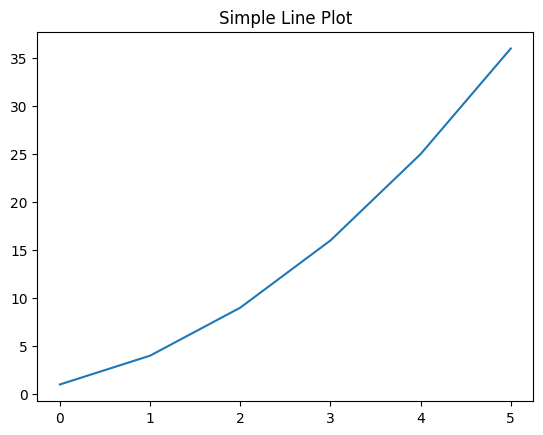

In [ ]:
import matplotlib.pyplot as plt

# Random sample data
x = [i for i in range(6)] # add an extra point here, see what happens!
y = [1, 4, 9, 16, 25, 36] # add an extra point here, see what happens!

# Create a plot
plt.plot(x, y)

## Add title and labels
plt.title("Simple Line Plot")
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")

# Show the plot
plt.show()



---

You can customize the plot by changing colors, line styles, and markers.


---



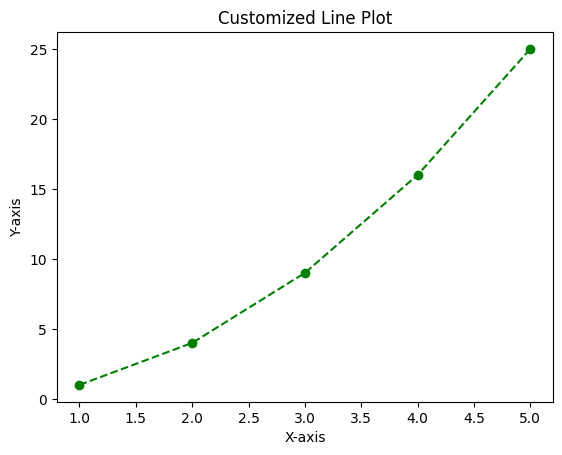

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# Create a plot with customization
plt.plot(x, y, color='green', linestyle='--', marker='o')

# Add title and labels
plt.title("Customized Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show the plot
plt.show()



---

Try varying some of the plotting options, axis labels and see what happens!

---





---

We can also superimpose plots. For instance, we can add multiple lines to the same plot by calling `plt.plot` multiple times before `plt.show`.

---



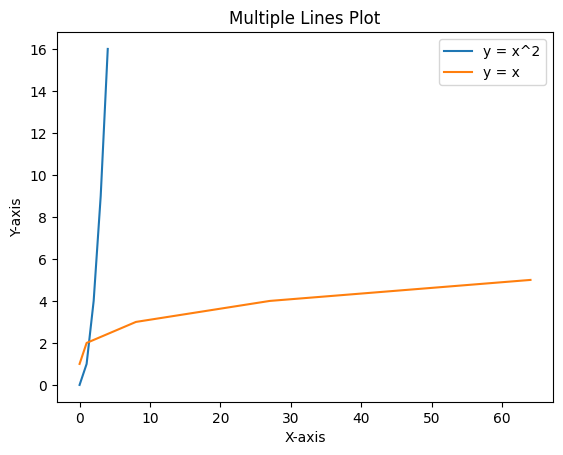

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x1 = [i for i in range(5)]
x2=[i**3 for i in range(5) ]
y1 = [i**2 for i in range(5)]
y2 = [1, 2, 3, 4, 5]

# Create multiple lines
plt.plot(x1, y1, label='y = x^2')
plt.plot(x2, y2, label='y = x')

# Add title and labels
plt.title("Multiple Lines Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Add a legend
plt.legend()

# Show the plot
plt.show()




---

Or scatter plots

---



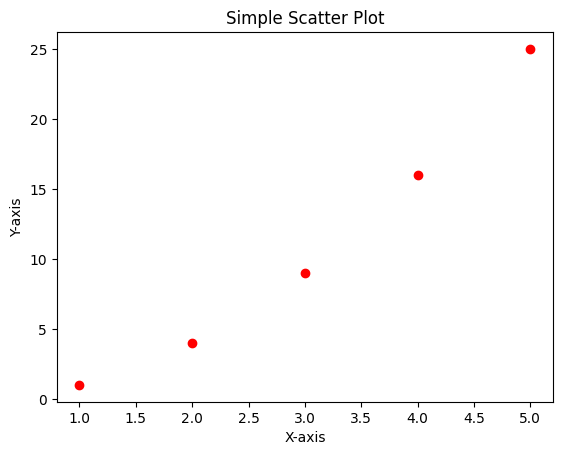

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

# Create a scatter plot
plt.scatter(x, y, color='red')

# Add title and labels
plt.title("Simple Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show the plot
plt.show()




---

We will explore more features of matplotlib along the course, but if you want to find more information, you can always check the [official documentation webpage](https://matplotlib.org/).

---



### **Exploring data**




---


Let's take the simulated measurements, attempting to recreate the environment of the LHCb experiment at CERN. Here you see the simulated mass of reconstructed B-mesons. Why is the mass not constant, but has a spread? And why does the reconstructed mass look different when we look at data?

---



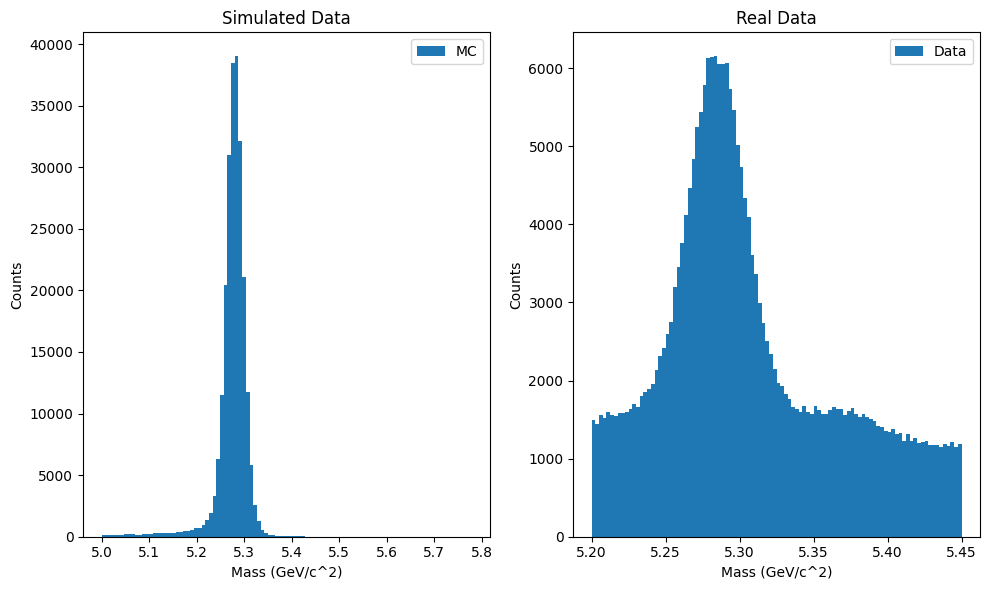

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# We can create multiple subplots in a single figure.
plt.subplot(1, 2, 1) # nrows, ncols, index

# We now create a histogram, to check the distribution of the dataset
plt.hist(df_lhcb_mc['mass'], bins=100, label='MC')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('Simulated Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_lhcb_data['mass'], bins=100, label='Data', range=[5.2,5.45])
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('Real Data')
plt.legend()

plt.tight_layout()
plt.show()




---

What happens if we change the binning of our histograms? How can we set the x-axis range?

---





---



Let's keep exploring our data-sets.

We can look at different variables. For example, let's check out the momentum of the two pions that construct our B-meson candidate

---



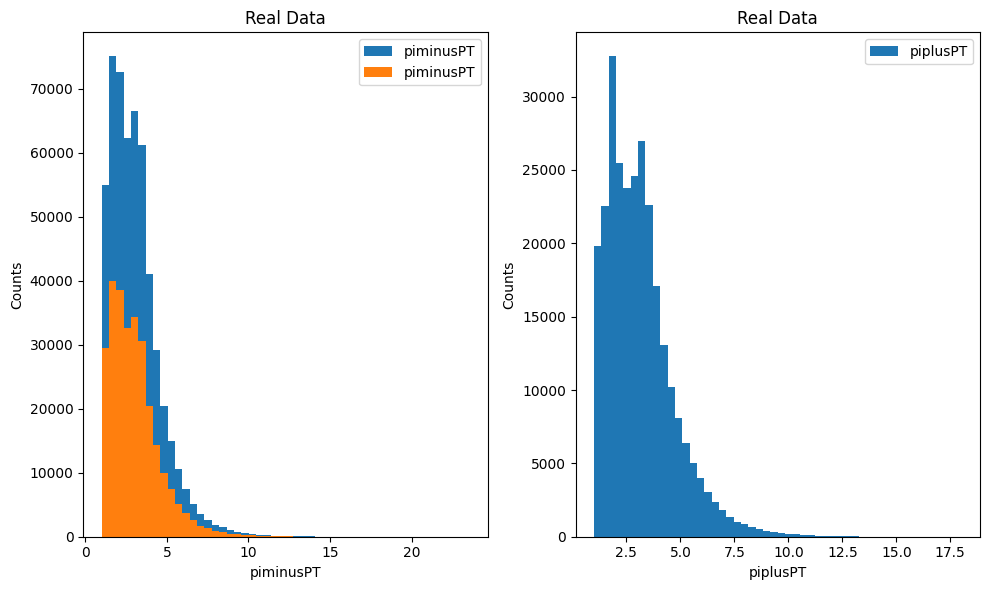

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
# Plot a variable 'piminusPT' while at the same time requiring a specific value of a different variable 'tag'
plt.hist(df_lhcb_data['piminusPT'], bins=50, label='piminusPT')
plt.hist(df_lhcb_data[df_lhcb_data['tag']==1]['piminusPT'], bins=50, label='piminusPT')
plt.xlabel('piminusPT')
plt.ylabel('Counts')
plt.title('Real Data')
plt.legend()

plt.subplot(1, 2, 2)
# Plot a variable 'piplusPT' while at the same time requiring a specific value of a different variable 'tag'
plt.hist(df_lhcb_data[df_lhcb_data['tag']==1]['piplusPT'], bins=50, label='piplusPT')
plt.xlabel('piplusPT')
plt.ylabel('Counts')
plt.title('Real Data')
plt.legend()

# Give the two subplots some extra space
plt.tight_layout()
plt.show()



---


It is often useful to check correlations between different variables. To
quickly understand levels of correlation we can plot 2-D histograms of our variables. For example, if we look at the mass of the B-meson and the momentum of one of the pions:


---



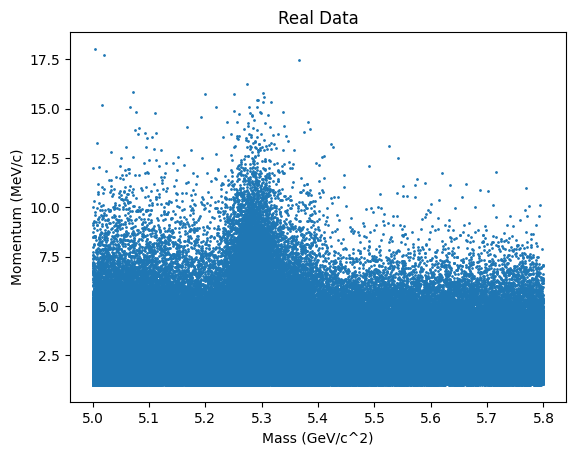

In [ ]:
plt.figure()
plt.scatter(df_lhcb_data.loc[df_lhcb_data['tag']==1]['mass'], df_lhcb_data.loc[df_lhcb_data['tag']==1]['piplusPT'], s=1) #make points with small size
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Momentum (MeV/c)')
plt.title('Real Data')
plt.show()




---


we can see that they are correlated. The correlation level and distribution
becomes clearer when we make a *colorbar* plot, where the color-axis shows the number of entries per bin.

---



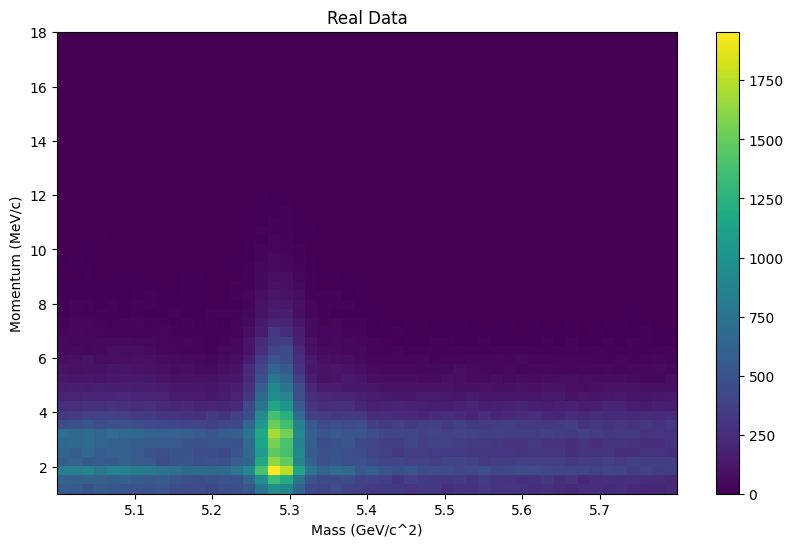

In [ ]:

plt.figure(figsize=(10, 6))
plt.hist2d(df_lhcb_data[df_lhcb_data['tag']==1]['mass'], df_lhcb_data[df_lhcb_data['tag']==1]['piplusPT'], bins=50)
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Momentum (MeV/c)')
plt.title('Real Data')
plt.colorbar()
plt.show()



---


What other data do you feel like looking at? The first step of data analysis is exploration, and you can keep visualising and searching for interesting patterns in these data-sets. Maybe you find something we haven't noticed!


---



### **Filtering data**

In reality, real data often contains more than one physical (or even artificial) processes. We may be interested in one or more than one of them. We usually denote the process (or processes) we are interested in as <font color='blue'>*signal(s)*</font>. Other processes, that we are not interested in, but may contaminate our data are usually refered to as <font color='red'>*backgrounds*</font>.

Part of our goal in data analysis is to separate <font color='blue'>*signal(s)*</font> from <font color='red'>*backgrounds*</font>, keeping as much of the first as possible while rejecting as much the second as we can. This process is usually called filtering or selection.

We apply filters by using variables that have a significantly different behaviour between <font color='blue'>*signal*</font> and <font color='red'>*background*</font>.

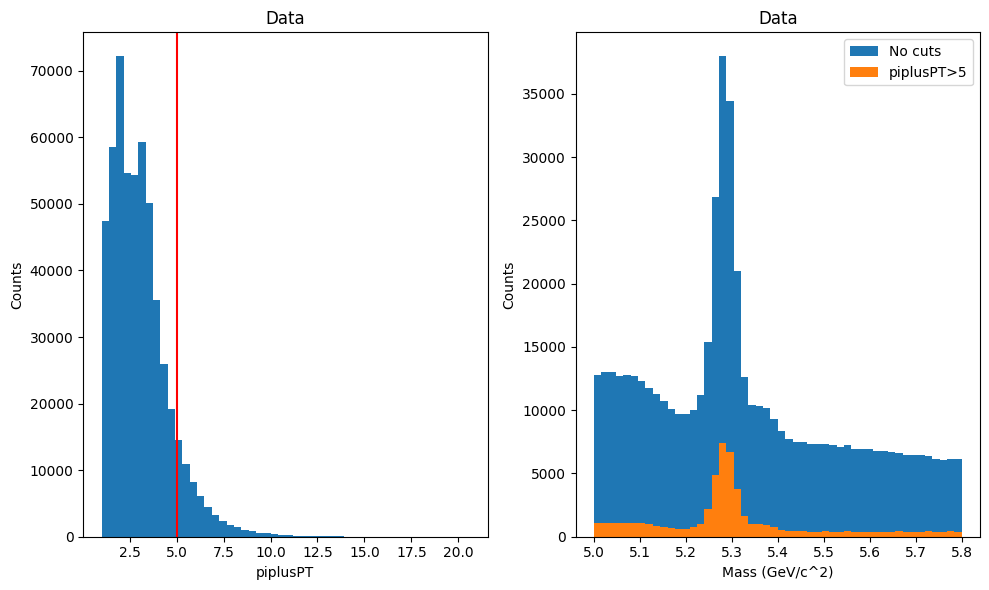

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df_lhcb_data['piplusPT'], bins=50)
plt.xlabel('piplusPT')
plt.ylabel('Counts')
plt.title('Data')
plt.axvline(x=5, color='red')


plt.subplot(1, 2, 2)
plt.hist(df_lhcb_data['mass'], bins=50, label='No cuts')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('Data')
plt.legend()

##You can change the cut value or variable here, and see what happens!
plt.hist(df_lhcb_data[df_lhcb_data['piplusPT']>5]['mass'], bins=50, label='piplusPT>5')
plt.legend()

plt.tight_layout()
plt.show()




---

Applying any cuts to our data-set has one inevitable side-effect: it reduces the amount of statistics we have to do our analysis. This is very important, as we will see in the next lessons. Our job is to try and find cuts that reject as much background as possible, without reducing our signal too much. Feel free to change the cut value or variable, and see what happens!

---



### **Cheating to win the game: let's use simulation**

If our data-set is made from signal and background, it's hard to tell which cuts to use in order to separate them... A handy way to get around this problem is to use *Simulation* to look at how our signal behaves without that pesky background. In physics we often use a  technique called **Monte Carlo (MC)** method to simulate experimental data, either for generating the physics processes themselves and/or for the interaction with our instruments. The MC method has its origins in statistics, but we need lesson 2 to be able to fully understand it. For now, let's take a look at the sample that we have generated for our signal process using the MC method:


---



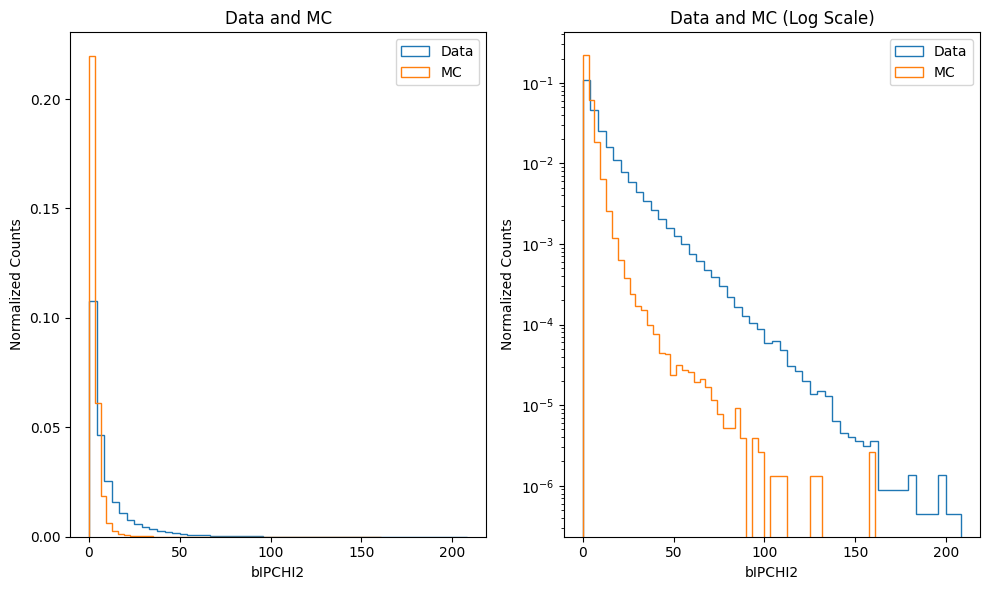

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)

# We want to compare the shapes of the two histograms, regardless of number of entries.
# To do this, we need to normalize our histograms, using `density=True`
plt.hist(df_lhcb_data['bIPCHI2'], bins=50, label='Data', density=True,  histtype='step')
plt.hist(df_lhcb_mc['bIPCHI2'], bins=50, label='MC', density=True, histtype='step')
plt.xlabel('bIPCHI2')
plt.ylabel('Normalized Counts')
plt.title('Data and MC')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_lhcb_data['bIPCHI2'], bins=50, label='Data', density=True, histtype='step')
plt.hist(df_lhcb_mc['bIPCHI2'], bins=50, label='MC', density=True, histtype='step')
plt.xlabel('bIPCHI2')
plt.ylabel('Normalized Counts')

# To better understand differences in shape in the tails of the distribution, let's plot in log-scale
plt.yscale('log')
plt.title('Data and MC (Log Scale)')
plt.legend()

plt.tight_layout()
plt.show()




---

* Can you think of a cut that makes sense to remove the background?
* Can you plot the distribution of the mass before and after the cut?
* What other cuts can you think of?

---





---

What if we have two variables that can help us improve the purity of our signal?

---



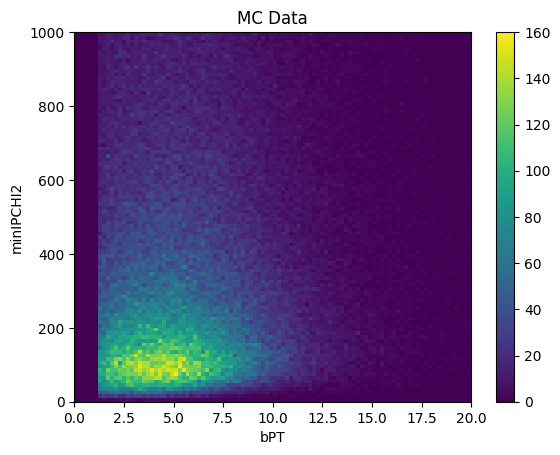

In [ ]:
plt.figure()
plt.hist2d(df_lhcb_mc['bPT'], df_lhcb_mc['minIPCHI2'], range=[[0,20],[0, 1000]], bins=100)
plt.xlabel('bPT')
plt.ylabel('minIPCHI2')
plt.title('MC Data')
plt.colorbar()
plt.show()




---

What are the cut values that we should apply to the two variables?

---



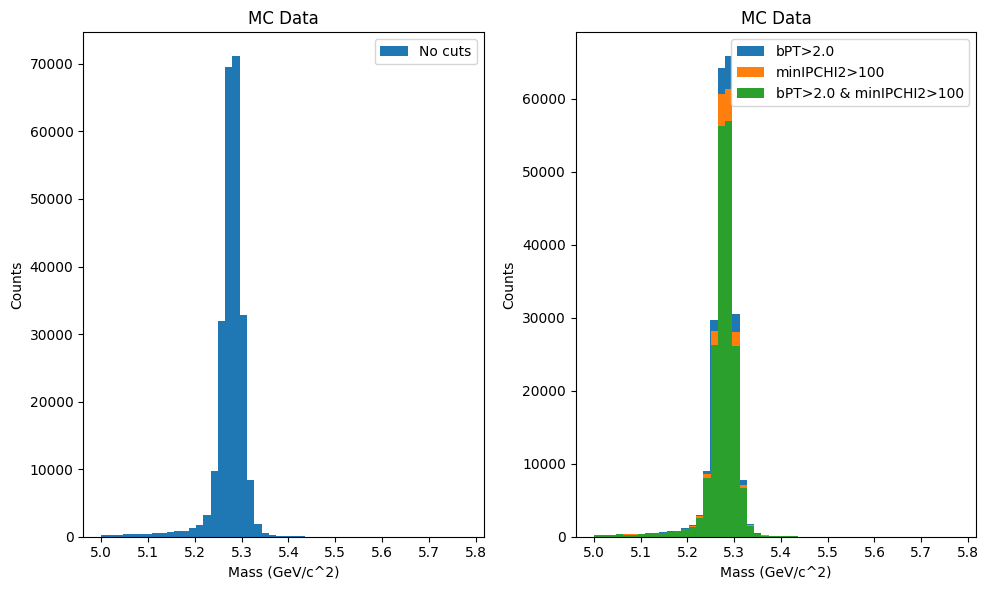

In [ ]:

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df_lhcb_mc['mass'], bins=50, label='No cuts')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('MC Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_lhcb_mc[df_lhcb_mc['bPT']>2.0]['mass'], bins=50, label='bPT>2.0')
plt.hist(df_lhcb_mc[df_lhcb_mc['minIPCHI2']>100]['mass'], bins=50, label='minIPCHI2>100')
plt.hist(df_lhcb_mc[(df_lhcb_mc['bPT']>2.0) & (df_lhcb_mc['minIPCHI2']>100)]['mass'], bins=50, label='bPT>2.0 & minIPCHI2>100')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('MC Data')
plt.legend()

plt.tight_layout()
plt.show()




---

Let's now look at the effect on data

---



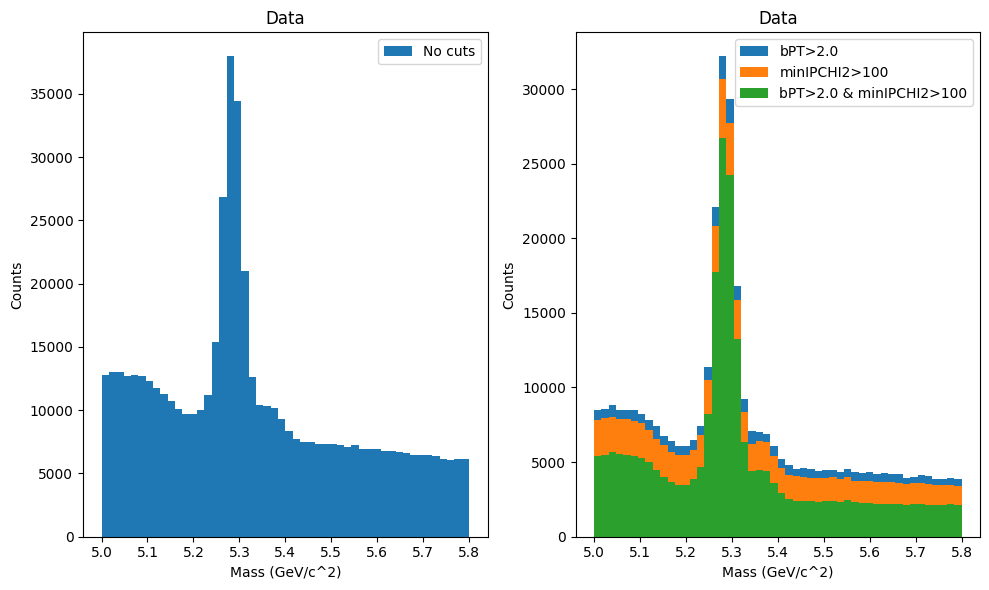

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(df_lhcb_data['mass'], bins=50, label='No cuts')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_lhcb_data[df_lhcb_data['bPT']>2.0]['mass'], bins=50, label='bPT>2.0')
plt.hist(df_lhcb_data[df_lhcb_data['minIPCHI2']>100]['mass'], bins=50, label='minIPCHI2>100')
plt.hist(df_lhcb_data[(df_lhcb_data['bPT']>2.0) & (df_lhcb_data['minIPCHI2']>100)]['mass'], bins=50, label='bPT>2.0 & minIPCHI2>100')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Counts')
plt.title('Data')
plt.legend()

plt.tight_layout()
plt.show()




---

We see that our background reduces, but our signal as well. You will see on this school how to use Machine Learning to optimise the purity of your data filtering!

---



---
### Missing Values and Variable Correlations
Often, in statistical analysis, we encounter missing data or mistakes.

This will often result in wrong analyses and conclusions.

We also would like to know whether some variables are correlated.

Consider the code below:

In [ ]:
# Missing variables
import pandas as pd
import numpy as np

# Create a DataFrame with some misisng data
df = pd.DataFrame({
    "age": [20, 30, np.nan, 40, 50],
    "gender": ["male", "female", "male", np.nan, "female"],
    "income": [50000, 60000, np.nan, 80000, 90000]
})
# help(pd.DataFrame)
print(df)

# Calculate the missingness for each variable
missingness = df.isnull().sum() / len(df)
# help(df.isnull)

# Print the missingness for each variable
print(missingness)

In [ ]:
# Create a DataFrame with some misisng data
df = pd.DataFrame({
    "age": [20, 30, np.nan, 40, 50],
    "gender": ["male", "female", "male", np.nan, "female"],
    "income": [50000, 60000, np.nan, 80000, 90000]
})

# Uncomment the following lines
## Calculate the correlation matrix for the DataFrame
#correlation_matrix = df.corr()

## Print the correlation matrix
#print(correlation_matrix)



---


Why is there an error?

How can you fix it?

Did you find a solution?


---



# Second lecture: Probability density functions and fitting


### Measures of Central Tendency
Lets go to the very basics, the foundations of statistics.
What do you understand by:


1. Mean?
2. Median?
3. Mode?
4. Range?
5. Variance?
6. Standard deviation?
7. Coefficient of variation?
8. Skewness?
9. Kurtosis?

Consider the code below.

In [ ]:
# Generate random dataset

import numpy as np

# Set the size of the dataset
data_size = 100000

# Generate random data from a normal distribution
data = np.random.normal(loc=500, scale=1, size=data_size)
# help(np.random.normal)

data = np.round(data)
# help(np.round)

import matplotlib.pyplot as plt





---

SciPy is a python library that builds on top of NumPy, and provides optimised functions for integration, extrapolation and statistical analysis.

---



In [ ]:
# Calculate and print the mean, median, mode, range, variance, standard deviation, coefficient of variation, skewness, and kurtosis

mean = np.mean(data)
# help(np.mean)
print(f"Mean: {mean}")

median = np.median(data)
# help(np.medina)
print(f"Median: {median}")

from scipy import stats

mode = stats.mode(data)
# help(stats.mode)
print(f"Mode: {mode.mode}")

range_min = np.min(data)
range_max = np.max(data)
# help(np.min)
# help(np.max)
print(f"Range: {range_min} - {range_max}")

variance = np.var(data)
#help(np.var)
print(f"Variance: {variance}")

standard_deviation = np.std(data)
# help(np.std)
print(f"Standard deviation: {standard_deviation}")

coefficient_of_variation = standard_deviation / mean
print(f"Coefficient of variation: {coefficient_of_variation}")

skewness = stats.skew(data)
# help(stats.skew)
print(f"Skewness: {skewness}")

kurtosis = stats.kurtosis(data)
# help(stats.kurtosis)
print(f"Kurtosis: {kurtosis}")

Try:


*   Change the data size, the mean, nad standard deviation and observe what happens to the measures of central tendency.
*   Change the number of decimal places to round off the array. Use the help functionality.


### **Probability**

When we perform a measurement over and over, in a perfect world, we would expect the exact same result, right?

But, in real life, randomness comes into play: our measurement instruments may not perfect, or maybe our system has a fundemantal randomness - for example, quantum mechanics, which governs nuclear and particle physics!

In order to quantify randomness, we need to start thinking of in terms of probability. Probability is a tricky concept, but there's typically two ways to look at it:
*   Imagine performing an experiment N times. Out of those N times, we have A times an occurence of a specific result. The fraction of times that A occurs if we could perform the measurement up to infinity is our probability. This is called the Frequentist approach.
*   We can also think of probability in a subjective way, comparing it to a pre-defined hypothesis, let's call it A. The probability then corresponds to our degree of belief that the hypothesis A is true. This is often referred to as the Bayesian approach.

In both cases, we will need to relate our data to the probability concept, and we do this by using **Probability Density Functions (PDFs).**

If we imagine our experiment has an outcome that is described by a single variable *x*. The PDF describes the distribution of probabilities for observing the outcome of the experiment in the sample space of *x*. By construction: ∫f(x)dx = 1


---



In [ ]:
# prompt: Plot random data distributed gaussianly. Then on a separate plot next to it, plot the PDF from which it was generated

import matplotlib.pyplot as plt
import numpy as np

# Generate random data distributed gaussianly
data = np.random.normal(loc=0, scale=1, size=100)

# Define the PDF of the gaussian distribution
def gaussian_pdf(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Create the x-axis for the PDF plot
x = np.linspace(-4, 4, 100)

# Plot the data and the PDF
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.hist(data, bins=50, density=False)
plt.xlabel('x')
plt.ylabel('Entries')
plt.title('Data histogram')

data = np.random.normal(loc=0, scale=1, size=1000)
plt.subplot(2, 2, 2)
plt.hist(data, bins=50, density=False)
plt.xlabel('x')
plt.ylabel('Entries')
plt.title('Data histogram')

data = np.random.normal(loc=0, scale=1, size=10000)
plt.subplot(2, 2, 3)
plt.hist(data, bins=50, density=False)
plt.xlabel('x')
plt.ylabel('Entries')
plt.title('Data histogram')

plt.subplot(2, 2, 4)
plt.plot(x, gaussian_pdf(x, 0, 1))
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Probability Density Function')

plt.tight_layout()
plt.show()




---


Often our measurements are characterized not only by one, but many variables, which we want to study together. We can generalize the 1-D definition of PDFs for more than one variable. For instance, for two dimensions, *x* and *y*, we can have the PDF *f(x,y)*.   


---



In [ ]:
# prompt: Generate a 2-dimensional dataset with x distributed Gaussianly and y distributed exponentially. Show the scatter plot, as well as the two individual PDFs in three separate plots.

import numpy as np
import matplotlib.pyplot as plt

# Generate random data
x = np.random.normal(loc=0, scale=1, size=1000)
y = np.random.exponential(scale=2, size=1000)

# Define the PDFs
def gaussian_pdf(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

def exponential_pdf(x, lam):
    return lam * np.exp(-lam * x)

# Create the x-axis for the PDF plots
x_axis = np.linspace(-4, 4, 100)
y_axis = np.linspace(0, 5, 100)

# Plot the data and the PDFs
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(x, y, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data scatter plot')

plt.subplot(2, 2, 2)
plt.plot(x_axis, gaussian_pdf(x_axis, 0, 1))
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('PDF of x')

plt.subplot(2, 2, 3)
plt.plot(y_axis, exponential_pdf(y_axis, 1))
plt.xlabel('y')
plt.ylabel('Probability density')
plt.title('PDF of y')

plt.tight_layout()
plt.show()




---


We will see more about various common PDFs, and how to use them in practice, in Lesson 2!

---



### **Mean & Mode**

Let's go back to our 1-D PDF *f(x)*. The *mean* or *expectation value* of *x* can be seen as the average of the possible values *x* can take, weighted by each value's probabilities. Kind of like a weighted average.

The *mean* is often denoted as μ and its interpretation heavily depends on the PDF shape.

The *mode* of a PDF is the value of *x* where the PDF gets its maximum value, i.e. the most probable value of our distribution.

Is the mean and mode the same thing?

---



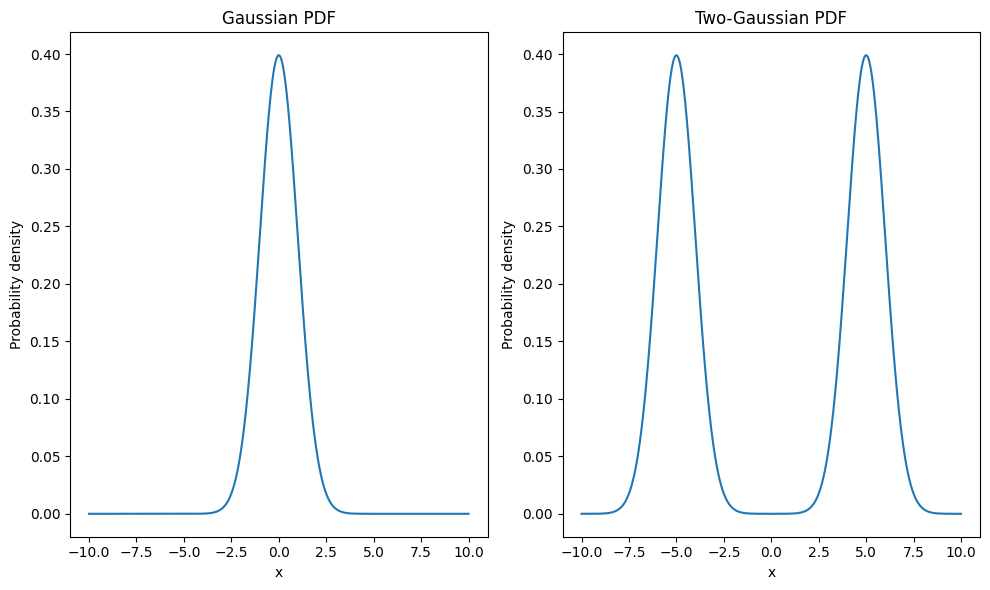

Gaussian PDF:
  Mean: 0.000
  Mode: -0.010
Two-Gaussian PDF:
  Mean: 0.000
  Mode: -4.995


In [7]:
# prompt: Create a gaussian PDF and a two-gaussian PDF. Plot them separately. Give me the mean and mode for each.

import numpy as np
import matplotlib.pyplot as plt

# Define the PDFs
def gaussian_pdf(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

def two_gaussian_pdf(x, mu1, sigma1, mu2, sigma2):
    return 1/(sigma1 * np.sqrt(2 * np.pi)) * np.exp(-(x - mu1)**2 / (2 * sigma1**2)) + 1/(sigma2 * np.sqrt(2 * np.pi)) * np.exp(-(x - mu2)**2 / (2 * sigma2**2))

# Create the x-axis for the PDF plots
x = np.linspace(-10, 10, 1000)

# Plot the data and the PDFs
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(x, gaussian_pdf(x, 0, 1))
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Gaussian PDF')

plt.subplot(1, 2, 2)
plt.plot(x, two_gaussian_pdf(x, -5, 1, 5, 1))
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Two-Gaussian PDF')

plt.tight_layout()
plt.show()

# Calculate the mean and mode for each PDF
gaussian_mean = np.mean(x)
gaussian_mode = x[np.argmax(gaussian_pdf(x, 0, 1))]

two_gaussian_mean = np.mean(x)
two_gaussian_mode = x[np.argmax(two_gaussian_pdf(x, -5, 1, 5, 1))]

print("Gaussian PDF:")
print(f"  Mean: {gaussian_mean:.3f}")
print(f"  Mode: {gaussian_mode:.3f}")

print("Two-Gaussian PDF:")
print(f"  Mean: {two_gaussian_mean:.3f}")
print(f"  Mode: {two_gaussian_mode:.3f}")




---


We see that the mean doesn't always correspond to the most probable value of our distribution. In general, the more evenly distributed our data is, the closer the mean will correspond to the most probable value, but this assumption breaks down for un-even PDFs.


---



### **Standard deviation, RMS and variance**

In statistics, we have various ways of quantifying the spread of a distribution of data. It can often be confusing to distinguish between them, so let's try and clear up things.

* **Root Mean Square (RMS)** is the square root of the mean of the squares of the values of our dataset. It can be viewed as a measure of the magnitude of a set of numbers.

$$ RMS = \sqrt{\frac{1}{N}\sum_{i=1}^{N} x_i^2 }$$

* **Variance** measures the dispersion of a set of data points around their mean value. It is defined as the average of the squared differences from the mean.

$$ Variance(\sigma^2) = \frac{1}{N}\sum_{i=1}^{N} (x_i-\mu)^2 $$

* **Standard deviation** is the square root of the variance. It provides a measure of the average distance of each data point from the mean.

$$ Variance(\sigma) = \sqrt{\frac{1}{N}\sum_{i=1}^{N} (x_i-\mu)^2} $$

Can you try and implement their definitions using python?

---



In [ ]:
# Can you try defining and calculating the RMS, variance and standard deviation of the following small data-set?
import numpy as np

# Sample data
data = np.array([1, 2, 3, 4, 5])



---

NumPy already provides built-in functions to calculate these quantities!

---



In [6]:
import numpy as np

# Sample data
data = np.array([1, 2, 3, 4, 5])

# Variance
variance = np.var(data)
print(f"Variance: {variance}")

# Standard Deviation
standard_deviation = np.std(data)
print(f"Standard Deviation: {standard_deviation}")

# Root Mean Square (RMS)
rms = np.sqrt(np.mean(data**2))
print(f"RMS: {rms}")

Variance: 2.0
Standard Deviation: 1.4142135623730951
RMS: 3.3166247903554


## Examples of Probability Density Functions

In the following, we will explore some of the most common PDFs used in physics, and give a few examples from real data!


---




### Binomial and multinomial distributions

 When there are only two potential outcomes from our measurement, the probabilities of each are described by the *binomial* PDF. This is the "yes" or "no" , "0" or "1", "success" or "failure" distribution.

 The multinomial distribution is a generalization of the binomial,  where there are not only two outcomes but rather a discrete number of m outcomes.


---



In [ ]:
# prompt: Generate a dataset from a binomial and a multinomial distribution and plot them side by side.

# Define the parameters for the binomial and multinomial distributions
n_trials = 10
p = 0.6
n_categories = 3

# Generate the datasets
binomial_data = np.random.binomial(n_trials, p, size=1000)
multinomial_data = np.random.multinomial(n_trials, [p, 1-p, 1-p], size=1000)

# Plot the histograms
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(binomial_data, bins=np.arange(n_trials + 2) - 0.5, edgecolor='black')
plt.xlabel('Number of successes')
plt.ylabel('Frequency')
plt.title('Binomial Distribution')

plt.subplot(1, 2, 2)
plt.hist(multinomial_data, bins=np.arange(n_trials + 2) - 0.5, edgecolor='black')
plt.xlabel('Number of successes in each category')
plt.ylabel('Frequency')
plt.title('Multinomial Distribution')

plt.tight_layout()
plt.show()


### Poisson distributions

In the limit where the number of events becomes very large, the probability of success becomes very small but hte expectation value of number of successes (i.e. N*p) stays the same, the binomial distribution transforms to the Poisson distribution.


---



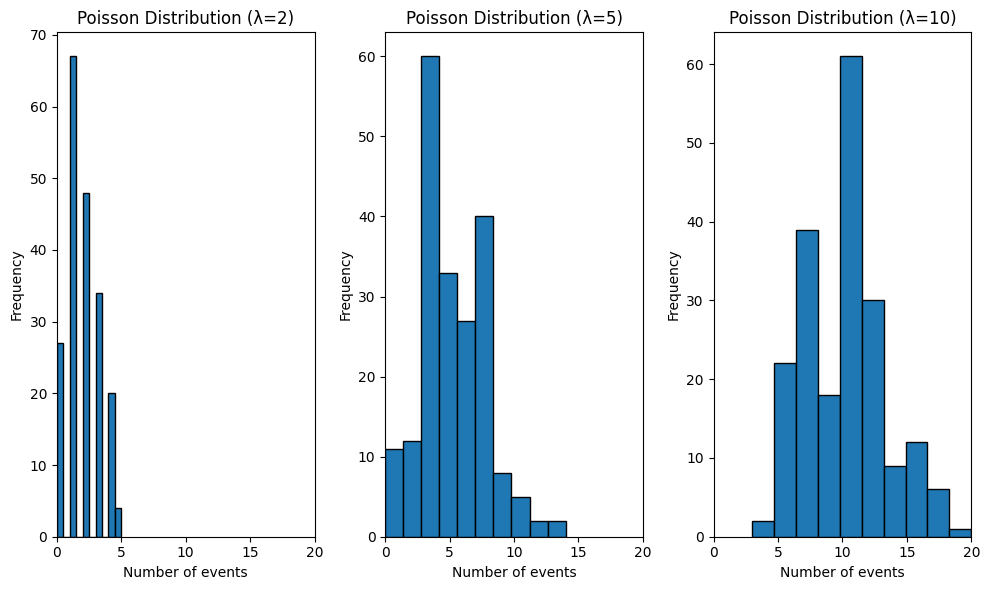

In [13]:
# prompt: Plot a few Poisson distributions side by side

# Define the parameters for the Poisson distributions
lambdas = [2, 5, 10]

# Generate the datasets
data = []
for lambda_value in lambdas:
    data.append(np.random.poisson(lambda_value, size=200))

# Plot the histograms
plt.figure(figsize=(10, 6))

for i, lambda_value in enumerate(lambdas):
    plt.subplot(1, len(lambdas), i + 1)
    plt.hist(data[i], edgecolor='black')
    plt.xlim(0,20)
    plt.xlabel('Number of events')
    plt.ylabel('Frequency')
    plt.title('Poisson Distribution (λ={})'.format(lambda_value))

plt.tight_layout()
plt.show()


### Gaussian (or normal) distributions

The Gaussian (also called normal) distribution is a special one! We will see in the next lesson why. For now, let's check how it looks like:

$f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

The parameters $\mu$ and $\sigma^2$ are also called mean and variance - the mean and variance of a Gaussian distribution give its parameters!  


---



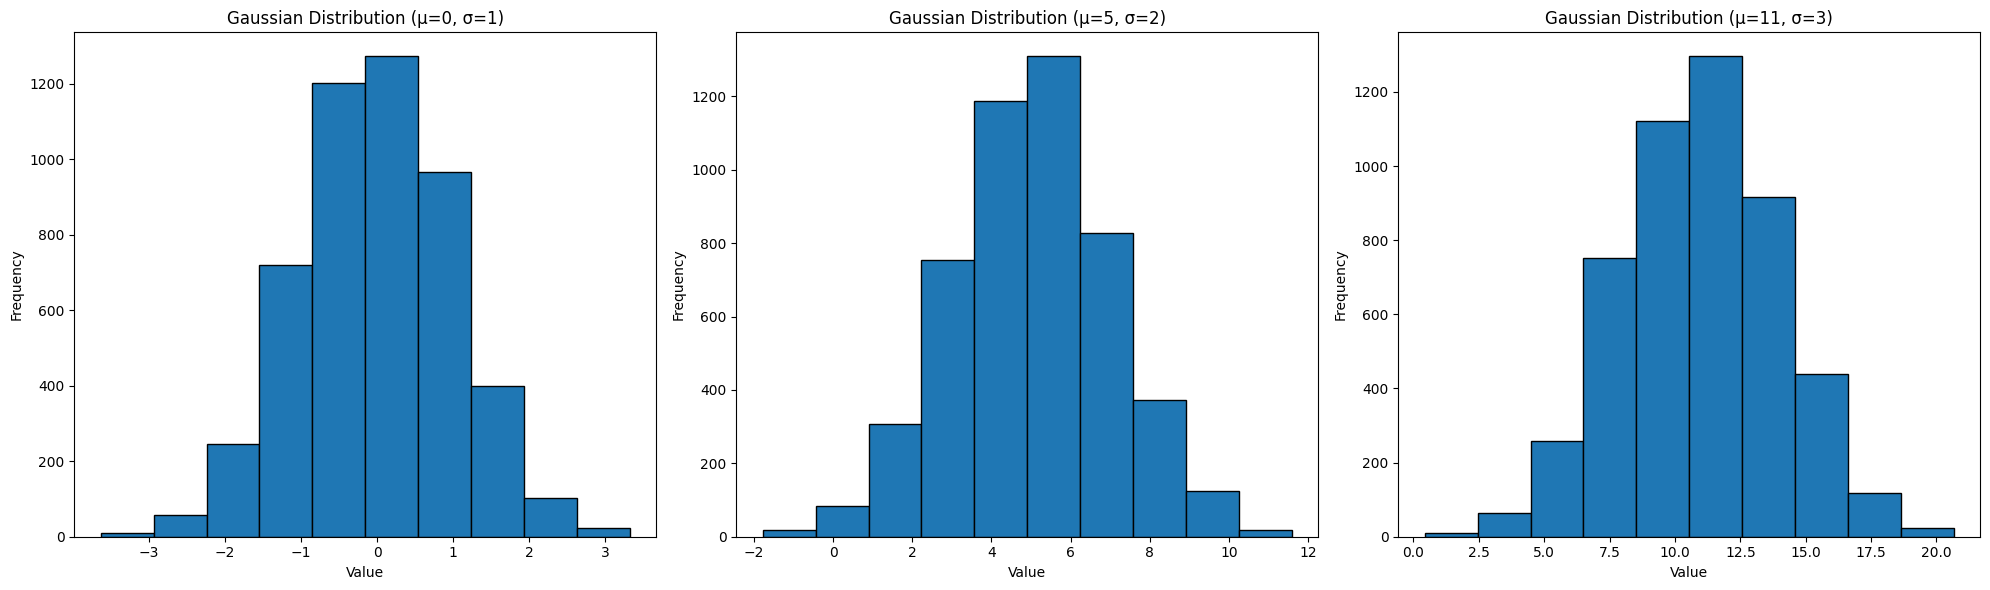

In [19]:
# Define the parameters for the gaussian distributions
means = [0, 5, 11] # add an extra parameter here, and see what happens
sigmas = [1, 2, 3] # add an extra parameter here and see what happens

# Generate the datasets
data = []
for mean, sigma in zip(means, sigmas):
    data.append(np.random.normal(loc=mean, scale=sigma, size=5000))

# Plot the histograms
plt.figure(figsize=(20, 6))

for i, (mean, sigma) in enumerate(zip(means, sigmas)):
    plt.subplot(1, len(means), i + 1)
    plt.hist(data[i], edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Gaussian Distribution (μ={}, σ={})'.format(mean, sigma))

plt.tight_layout()
plt.show()


What are trends and observations you have on the Gaussian PDF? How does it change when we vary its parameter?

---





---

The distribution of events in Gaussian is also important to know, as it will serve us later on. How many events are contained within 1, 2 or 3 standard deviations?

---



In [ ]:
# Define the parameters for the gaussian distribution
mean = 20
sigma = 5

# Generate the data
data = np.random.normal(loc=mean, scale=sigma, size=10000)

# Calculate the 1 and 2 sigma limits
sigma_1p = mean + sigma
sigma_1m = mean - sigma
sigma_2p = mean + 2 * sigma
sigma_2m = mean - 2 * sigma
sigma_3p = mean + 3 * sigma
sigma_3m = mean - 3 * sigma

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, edgecolor='black', bins=50)
plt.xlim(mean-10*sigma, mean+10*sigma)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Gaussian Distribution (μ={}, σ={})'.format(mean, sigma))

# Add vertical lines for the 1, 2 and 3 sigma limits
plt.axvline(x=sigma_1p, color='orange', linestyle='--')
plt.axvline(x=sigma_2p, color='red', linestyle='--')
plt.axvline(x=sigma_3p, color='green', linestyle='--')
# Add vertical lines for the 1 and 2 sigma limits
plt.axvline(x=sigma_1m, color='orange', linestyle='--')
plt.axvline(x=sigma_2m, color='red', linestyle='--')
plt.axvline(x=sigma_3m, color='green', linestyle='--')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: Check percentage of items in an array are within a certain limit


# Set the limit
limit = 1 * sigma

# Calculate the percentage of items within the limit
percentage = (np.abs(data - mean) < limit).mean() * 100

# Print the result
print(f"Percentage of items within {limit}: {percentage:.2f}%")




---

Can you check for the 2 and 3 sigma percentages?

---





---

### Extra exercise

Can you think of any more PDFs?  How would you go about generating data distributed according to them?


---



## Fits and Parameter estimation

### Fitting

So far in this lesson, we've been generating pseudo-datasets with known PDFs... But in real life we usually get data without knowing their PDF a-priori. Understanding how are data is distributed will help us make conclusions about them, as we will see in lesson 3.

We do this with a process that we call *fit* . Data fitting is basically us guessing a PDF for our data, and trying to determine the level of agreement between our guess and reality. Let's see a few examples:

---





In [ ]:
# prompt: Generate a graph with 4 points distributed linearly. Then fit them

import matplotlib.pyplot as plt
import numpy as np

# Generate the data
x = np.array([1, 2, 3, 4])
y = 2 * x + 1 #+ np.random.randn(4)

# Plot the data
plt.scatter(x, y)

# Show the plot
plt.show()



---

How do you believe the data is distributed?

---



In [ ]:


# Define the fitting function
def linear_function(x, m, b):
    return m * x + b

# Generate the data
x = np.array([1, 2, 3, 4])
y = 2 * x + 1

#Try and uncomment this next part, and see what happens when you change f
# Inject some randomness in our data
#f = 5
#y = y + 5* np.random.randn(4)

# Plot the data
plt.scatter(x, y)


# Fit the data
from scipy.optimize import curve_fit

params, _ = curve_fit(linear_function, x, y)

# Plot the fitted line
x_fit = np.linspace(0, 5, 100)
y_fit = linear_function(x_fit, *params)

plt.plot(x_fit, y_fit, color='red')

# Show the plot
plt.show()



---

Looks like our guess was not too bad! But how can we know *quantitatively* how good or bad our fit is? We will use something a *goodness-of-fit* test called *chi2*. The chi2 is a test-statistic. We will learn more about them in lesson 3!

The chi2 test-statistic is defined like so:

$\chi^2 = \sum_{i=1}^{n}\frac{(y_i - f(x_i))^2}{\sigma_i^2}$

and the smaller it is, the better our fit is.

---



In [ ]:
# Calculate the chi2
chi2 = np.sum(((y - linear_function(x, *params)) / np.std(y))**2)
print("Chi2: %.3f"% chi2)



---


Do you think this is a good or a bad fit? And what happens if you try to inject some randomness in the data?


---





---

We see that our fit chi2 is defined from a sum of all our measurements So the more measurements we have, the more accurate we can be in our goodness-of-fit test. Also, the more parameters our fit has, the more measurements we need to make an accurate prediction. Let's see this with an example, now looking in the gaussian distribution.

---



In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Plotting script
def plot_gaussian(axis, mu, std, nentries):
    # Generate some data for this demonstration.
    data = norm.rvs(mu, std, size=nentries)
    axis.hist(data, bins=25, density=True, alpha=0.6, color='g')

    # Fit a normal distribution to the data:
    mu_fit, std_fit = norm.fit(data)

    # Plot the histogram.
    xmin, xmax = ax1.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu_fit, std_fit)
    axis.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu_fit, std_fit)
    axis.set_title(title)
    return



# Plot the histogram.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)

# Plot the PDF.

plot_gaussian(ax1, 10.0, 2.5, 10)


## Uncomment the following 2 lines, see what happens!
#plot_gaussian(ax2, 10.0, 2.5, 100)
#plot_gaussian(ax3, 10.0, 2.5, 1000)

fig.show()



---


What do you observe? Is the fit compatible with the model we used to generate the dataset? What can we do to improve it?

---



### Parameter estimation using the Maximum Likelihood method

**Likelihood Function:**

The likelihood function, $L(\theta)$, measures the probability of observing the sample data given the parameter $\theta$. For a set of independent observations, $x_1, x_2,...,x_n$, the likelihood function is defined as:

$$L(\theta) = P(x_1, x_2,...,x_n | \theta)$$

For computational reasons, it is easier to work with the logarithm of the likelihood (because it's easier to make sums than products!)

$$logL(\theta) = \Sigma_{i=0}^{n} logP(x_i | \theta)$$


**Maximum Likelihood Estimation (MLE):**

The goal of the Maximum Likelihood Estimation is to find the parameter value that is more likely to
The goal of MLE is to find the parameter value $\hat{\theta}$ that maximizes the likelihood function. Mathematically, this is:

$$  \hat{\theta} = argmax L(\theta) $$

For computational reasons, it is often preferrable to actually minimize the log-likelihood function.

Let's see an example:

---



In [ ]:
import numpy as np
from scipy.optimize import minimize

# Step 1: Generate Sample Data
true_mu = 5
true_sigma = 2
np.random.seed(0)
data = np.random.normal(true_mu, true_sigma, 1000)

# Step 2: Define the Negative Log-Likelihood Function
def neg_log_likelihood(params, data):
    mu, sigma = params[0], params[1]
    N = len(data)
    log_likelihood = -N/2 * np.log(2 * np.pi) - N/2 * np.log(sigma**2) - 1/(2 * sigma**2) * np.sum((data - mu)**2)
    return -log_likelihood  # We negate because we will minimize

# Step 3: Use Numerical Optimization to Find Parameters
initial_guess = [0, 1]
result = minimize(neg_log_likelihood, initial_guess, args=(data,), bounds=[(None, None), (1e-6, None)])
estimated_mu, estimated_sigma = result.x

print(f"True mu: {true_mu}")
print(f"True sigma: {true_sigma}")
print(f"Estimated mu: {estimated_mu}")
print(f"Estimated sigma: {estimated_sigma}")



---

The result looks accurate! To be sure there's nothing strange going on, it's always a good idea to plot the likelihood scan.

---



In [ ]:
# Step 4: Plot the Likelihood Scan for mu
mu_values = np.linspace(estimated_mu - 2, estimated_mu + 2, 100)
likelihood_values_mu = [neg_log_likelihood([mu, estimated_sigma], data) for mu in mu_values]

plt.figure(figsize=(10, 5))

plt.scatter(mu_values, likelihood_values_mu, label='Negative Log-Likelihood (mu)')
plt.axvline(x=estimated_mu, color='r', linestyle='--', label='Estimated mu')
plt.xlabel('Mu')
plt.ylabel('Negative Log-Likelihood')
plt.title('Likelihood Scan for Mu')
plt.legend()
plt.grid(True)
plt.show()



---

Try a few different distributions, and see how the likelihood parameter estimation changes when considering more un-Gaussian distributions!

---



In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Step 1: Generate Sample Data
true_lambda = 3.5  # True parameter for Poisson distribution
np.random.seed(0)
data = np.random.poisson(true_lambda, 1000)

# Step 2: Define the Negative Log-Likelihood Function for Poisson Distribution
def neg_log_likelihood_poisson(lambda_, data):
    N = len(data)
    log_likelihood = -N * lambda_ + np.sum(data * np.log(lambda_) - np.log(np.arange(1, data.max() + 1)).sum())
    return -log_likelihood  # We negate because we will minimize

# Step 3: Use Numerical Optimization to Find Parameter (lambda)
initial_guess = [1.0]
result = minimize(neg_log_likelihood_poisson, initial_guess, args=(data,), bounds=[(1e-6, None)])

estimated_lambda = result.x[0]

print(f"True lambda: {true_lambda}")
print(f"Estimated lambda: {estimated_lambda}")

# Step 4: Plot the Likelihood Scan for lambda
lambda_values = np.linspace(estimated_lambda - 10, estimated_lambda + 10, 100)
likelihood_values_lambda = [neg_log_likelihood_poisson(lambda_, data) for lambda_ in lambda_values]

plt.figure(figsize=(10, 5))
plt.scatter(lambda_values, likelihood_values_lambda, label='Negative Log-Likelihood (lambda)')
plt.axvline(x=estimated_lambda, color='r', linestyle='--', label='Estimated lambda')
plt.axvline(x=true_lambda, color='b', linestyle='--', label='True lambda')
plt.xlabel('Lambda')
plt.ylabel('Negative Log-Likelihood')
plt.title('Likelihood Scan for Lambda (Poisson Distribution)')
plt.legend()
plt.grid(True)
plt.show()




---

You can see that for Poissonial distributions, the ML scan looks a bit asymmetric.
* What happens when you increase or decrease the number of scan points?
* What if you put an initial value that is very far from the true value?

---



# Third lecture: Statistical tests, hypothesis testing

### The Central Limit Theorem


---



The central limit theorem states that, in the limit of large sampling, no matter what the distribution of the samples, their means are distributed by a Gaussian whose mean is the mean of the distribution and whose sigma is the standard deviation of the distribution.

What does this tell us in practice? It tells us that if we measure a quantity over and over many times, its value will be a Gaussian distributed variable centered around the true value. This is very useful, since the true value is usually not known to us!

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define how many samples we're going to generate
n = 1

# Generate random samples from a normal distribution, each sample has 10000 events
samples = np.random.normal(loc=0, scale=1, size=(n, 10000))

plt.hist(samples[0], bins=50, edgecolor='black')
plt.show()

# Calculate the mean and standard deviation of each sample
sample_means = np.mean(samples, axis=1)
sample_stds = np.std(samples, axis=1)

from scipy.stats import norm
# Fit a normal distribution to the data:
mu_fit, sigma_fit = norm.fit(sample_means)

# Plot the histogram of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, range = [mu_fit - 3*sigma_fit, mu_fit+3*sigma_fit], bins=20, edgecolor='black', density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')




x = np.linspace(mu_fit - 3*sigma_fit, mu_fit+3*sigma_fit, 100)
p = norm.pdf(x, mu_fit, sigma_fit)
plt.plot(x, p, linewidth=2, color='red')

plt.show()
print("Gaussian mu: %.3f , sigma %.3f" %(mu_fit, sigma_fit))



---


We have generated a random sample, of 10000 events, distributed gaussianly. How would we go about checking that the CLT is valid?


---





---

It feels natural that the CLT holds for Gaussian distributions. But let's check that it really works for other types of distributions as well!

---



In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define how many samples we're going to generate
n = 1

# Generate random samples from a normal distribution, each sample has 10000 events

samples = np.random.uniform(low=0, high=1, size=(n, 10000))

plt.hist(samples[0], bins=50, edgecolor='black')
plt.show()

# Calculate the mean and standard deviation of each sample
sample_means = np.mean(samples, axis=1)
sample_stds = np.std(samples, axis=1)

from scipy.stats import norm
# Fit a normal distribution to the data:
mu_fit, sigma_fit = norm.fit(sample_means)

# Plot the histogram of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, range = [mu_fit - 3*sigma_fit, mu_fit+3*sigma_fit], bins=20, edgecolor='black', density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')




x = np.linspace(mu_fit - 3*sigma_fit, mu_fit+3*sigma_fit, 100)
p = norm.pdf(x, mu_fit, sigma_fit)
plt.plot(x, p, linewidth=2, color='red')

plt.show()
print("Gaussian mu: %.3f , sigma %.3f" %(mu_fit, sigma_fit))




---


There are situations where the CLT does not work well, typically when the sample size is too small or the underlying distribution has infinite variance (such as Cauchy distribution).


---



In [ ]:
# prompt: Show me an example of the Central Limit Theorem not working

import numpy as np
import matplotlib.pyplot as plt

# Number of samples to draw from the Cauchy distribution
sample_size = 1000

# Number of experiments to perform
num_experiments = 1000

# Draw samples from a Cauchy distribution
data = np.random.standard_cauchy((num_experiments, sample_size))

plt.hist(samples[0], bins=50, edgecolor='black')
plt.title('Example of the Cauchy distribution')
plt.show()

# Compute the means of these samples
sample_means = np.mean(data, axis=1)


# Plot the histogram of the sample means
plt.hist(sample_means, bins=100, range=[-10, 10], density=True, alpha=0.75, color='b', edgecolor='black')

#Try to fit the distribution of means with a Gaussian, as we did before
from scipy.stats import norm
# Fit a normal distribution to the data:
mu_fit, sigma_fit = norm.fit(sample_means)
p = norm.pdf(x, mu_fit, sigma_fit)
plt.plot(x, p, 'g--', lw=2, label='Gaussian Fit')


# Plot the theoretical Cauchy distribution
x = np.linspace(-10, 10, 1000)
plt.plot(x, 1/(np.pi * (1 + x**2)), 'r-', lw=2, label='Cauchy Distribution')

# Add labels and legend
plt.title('Histogram of Sample Means of Cauchy Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()



---


We see that the Gaussian fit doesn't manage to describe well or distribution of sample means.

**Explanation**: The Cauchy distribution is known for its heavy tails and undefined variance and mean.
In the example, we draw sample_size samples from a standard Cauchy distribution for num_experiments times.
We then compute the mean of each set of samples.
Finally, we plot the histogram of these sample means and overlay the theoretical Cauchy distribution for comparison.
What happens:
Unlike distributions with finite variance, the sample means from a Cauchy distribution do not converge to a normal distribution as the sample size increases.
Instead, they remain heavy-tailed and do not exhibit the normal distribution behavior predicted by the CLT. The CLT has its limitations.


---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian distributions
means = [5, 5.5, 10]  # Measured means
std = 1  # Standard deviation

# We make a hypothesis, that the true mean of our variable is 5
hypothesis_mean = 5

sample_size = 1000

# Generate random data from Gaussian distributions
data1 = np.random.normal(means[0], std, sample_size)
data2 = np.random.normal(means[1], std, sample_size)
data3 = np.random.normal(means[2], std, sample_size)

# Measured means (for demonstration, we'll use the sample means)
measured_means = [np.mean(data1), np.mean(data2), np.mean(data3)]

# Plot the histograms and vertical lines
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, ax in enumerate(axs):
    data = [data1, data2, data3][i]
    measured_mean = measured_means[i]

    # Plot the histogram
    ax.hist(data, bins=30, density=True, alpha=0.6, color='gray', edgecolor='black')

    # Plot the vertical lines
    ax.axvline(hypothesis_mean, color='g', linestyle='-', linewidth=2, label=f'Hypothesis Mean: {hypothesis_mean}')
    ax.axvline(measured_mean, color='r', linestyle='--', linewidth=2, label=f'Measured Mean: {measured_mean:.2f}')

    # Titles and labels
    ax.set_title(f'Gaussian Distribution with Mean {measured_mean}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()






---

* How well do you think our observed mean agrees with our hypothesis in each case?
* Can we try to quantify the level of agreement? And is there a best way to do so?
* When can we say we have proved or excluded a hypothesis?

---





---


So we've learned how to look at data, try to find their underlying PDF and estimate parameters that we're interested in ? But how can we tell, if the estimates are in line with what we were expecting?

A statistical test has as goal to make a *statement* about how well the observed data are in agreement with a **hypothesis**.  

Usually we refer to the hypothesis we want to test as the **null** hypothesis, while we may also a second hypothesis, called **alternative** hypothesis.

Let's visualize the purpose a statistical test.


---



### Constructing a test statistic

A test-statistic is a variable that we use to help us decide if a hypothesis is valid or not. For the previous example, we were looking at the mean of our data distribution - that could be a *test statistic*.

In order to make a conclusion about our hypothesis, we also need to define an acceptance and rejection region, as well as the border, or cut value between the two.


---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the distributions
mu0 = 0     # Mean under null hypothesis H0
mu1 = 1     # Mean under alternative hypothesis H1
sigma = 1   # Standard deviation (assumed to be known and the same under both hypotheses)
alpha = 0.05  # Significance level

# Generate x values
x = np.linspace(-3, 5, 1000)

# PDF under null hypothesis H0
y0 = norm.pdf(x, mu0, sigma)

# PDF under alternative hypothesis H1
y1 = norm.pdf(x, mu1, sigma)

# Critical value for the given significance level
# What value should we choose here? Try different values and see what happens.

critical_value = 2
# Uncomment this
#critical_value = norm.ppf(1 - alpha, mu0, sigma)

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, y0, label='$H_0: \mu = 0$', color='blue')
plt.plot(x, y1, label='$H_1: \mu = 1$', color='green')

# Fill the rejection region
plt.fill_between(x, 0, y0, where=(x > critical_value), color='blue', alpha=0.3)
plt.fill_between(x, 0, y1, where=(x > critical_value), color='green', alpha=0.1)

# Plot the critical value line
plt.axvline(x=critical_value, color='red', linestyle='--', label='Critical Value (Cut Value)')

# Labels and legend
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Hypothesis Testing: $H_0$ vs $H_1$')
plt.legend()

# Show the plot
plt.show()


### Significance and p-value

**Definition of significance:**
The significance level, denoted by $\alpha$, is the probability of rejecting the null hypothesis $H_0$ when it is actually true. It is a threshold set by us before conducting the test to determine how extreme the test statistic must be to reject our null hypothesis.

**Definition of p-value:**
he p-value is the probability of obtaining test results at least as extreme as the observed results, under the assumption that the null hypothesis is true. It quantifies with which confidence we can reject the null hypothesis.

The significance level is a fixed value that we decide a priori - while the p-value is obtained from our measurement.

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 0      # Mean of the distribution
sigma = 1   # Standard deviation of the distribution
alpha = 0.05  # Significance level

# Generate x values
x = np.linspace(-3, 3, 1000)

# Standard normal distribution
y = norm.pdf(x, mu, sigma)

# Critical value for the given significance level (one-tailed)
critical_value = norm.ppf(1 - alpha, mu, sigma)
print("Critical value (also called significance-level) is %.3f" %critical_value)


# Observed test statistic
observed_stat = 2.  # Example value in the critical region

# Compute p-value using cumulative distribution function (CDF)
p_value = 1 - norm.cdf(observed_stat, loc=mu, scale=sigma)
print("p-value: %.3f "% p_value)

# Compute quantile (inverse CDF)
z_value = norm.ppf(1 - p_value, loc=0, scale=sigma)
print("significance value: %.3f "% z_value)

# Plot the normal distribution
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Standard Normal Distribution', color='blue')

# Fill the significance level region (alpha)
plt.fill_between(x, 0, y, where=(x > critical_value), color='blue', alpha=0.3, label=f'Significance Level (α = {alpha})')

# Fill the p-value region
plt.fill_between(x, 0, y, where=(x > observed_stat), color='red', alpha=0.3, label='p-value')

# Plot the critical value line
plt.axvline(x=critical_value, color='blue', linestyle='--', label=f'Critical Value (z = {critical_value:.2f})')

# Plot the observed test statistic line
plt.axvline(x=observed_stat, color='red', linestyle='--', label=f'Observed Test Statistic (z = {observed_stat})')

# Labels and legend
plt.xlabel('z')
plt.ylabel('Probability Density')
plt.title('Significance Level (α) and p-value')
plt.legend()

# Show the plot
plt.show()




---

* Looking at this plot, do you think the hypothesis is accepted ? Or rejected?
* What happens if you change the value of `observed_stat`?
* What happens if you change the value of `alpha`?

---



### The chi2 method


---

We've already seen the chi2 variable in lesson 2, where we used it to test goodness of fit. But it can also be used for hypothesis testing!

Let's consider a scenario where we have surveyed a group of people to understand their preference for two brands of products (Brand A and Brand B) across two different age groups (Under 30 and 30 and Above). We want to test if there is a significant association between age group and brand preference.

In [ ]:
import numpy as np
import scipy.stats as stats

# Contingency table
#                Brand A  Brand B
# Under 30         30       10
# 30 and Above     20       40

observed = np.array([[30, 10], [20, 40]])

# Perform the Chi-Squared test for independence
chi2, p, dof, expected = stats.chi2_contingency(observed)

# Output the results
print("Chi-Squared Test Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("I reject the null hypothesis: There is a significant association between age group and brand preference.")
else:
    print("I fail to reject the null hypothesis: There is no significant association between age group and brand preference.")




---

What happens if:
* We try modifying the initial values?
* Change the cut value of our interpretation?

---



### The likelihood ratio method

In [ ]:
import numpy as np
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
n = 100
true_mu = 1.0
sigma = 1.0
data = np.random.normal(true_mu, sigma, n)

# Null hypothesis mean
mu_0 = 0.2

# Alternative hypothesis mean - in this case the mean value of our data-set
mu_hat = np.mean(data)

# Calculate the log-likelihoods
log_likelihood_mu_0 = -n/2 * np.log(2 * np.pi * sigma**2) - 1/(2 * sigma**2) * np.sum((data - mu_0)**2)
log_likelihood_mu_hat = -n/2 * np.log(2 * np.pi * sigma**2) - 1/(2 * sigma**2) * np.sum((data - mu_hat)**2)

# Likelihood ratio test statistic
lambda_stat = -2 * (log_likelihood_mu_0 )#- log_likelihood_mu_hat)

# Print results
print(f"True mean: {true_mu}")
print(f"Null hypothesis mean: {mu_0}")
print(f"Estimated mean: {mu_hat}")
print(f"Log-likelihood under H0: {log_likelihood_mu_0}")
print(f"Log-likelihood under H1: {log_likelihood_mu_hat}")
print(f"Likelihood ratio test statistic: {lambda_stat}")

# Calculate the p-value
p_value = chi2.sf(lambda_stat, df=1)
print(f"P-value: {p_value}")


# Visualize the likelihood functions
mu_values = np.linspace(mu_0 - 2, mu_hat + 2, 100)
log_likelihoods = [-1*(-n/2 * np.log(2 * np.pi * sigma**2) - 1/(2 * sigma**2) * np.sum((data - mu)**2)) for mu in mu_values]

plt.figure(figsize=(10, 5))
plt.plot(mu_values, log_likelihoods, label='Log-Likelihood')
plt.axvline(mu_0, color='r', linestyle='--', label='Null hypothesis mean')
plt.axvline(mu_hat, color='g', linestyle='--', label='Estimated mean')
plt.xlabel('Mean')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood for Different Means')
plt.legend()
plt.grid(True)
plt.show()




---

It is often useful to place the minimum of the likelihood at zero. In this way, we can easily check the 1 and 2 sigma variations.

---



In [ ]:
# Normalize the log-likelihoods
min_log_likelihood = np.min(log_likelihoods)
normalized_log_likelihoods = log_likelihoods - min_log_likelihood

# Calculate confidence intervals
confidence_intervals = [1.0*sigma, 2.0*sigma]  # 1-sigma and 2-sigma confidence intervals

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mu_values, normalized_log_likelihoods, label='Normalized Log-Likelihood')
plt.axhline(confidence_intervals[0], color='r', linestyle='--', label='1-sigma')
plt.axhline(confidence_intervals[1], color='g', linestyle='--', label='2-sigma')
plt.axvline(true_mu, color='k', linestyle='-', label='True Mean')
plt.axvline(mu_hat, color='b', linestyle='--', label='Estimated Mean')
plt.axvline(mu_0, color='orange', linestyle='--', label='Null hypothesis Mean')
# Zoom in on the y-axis
plt.ylim(-1, 5)
plt.xlim(true_mu - 1, true_mu + 1)
plt.xlabel('Mean')
plt.ylabel('Normalized Log-Likelihood')
plt.legend()
plt.grid(True)
plt.show()


# Fourth lecture: Some real data examples

## Fitting the LHCb dataset





---



### Signal simulation

Let's take our LHCb MC simulation sample. We can try to fit it, to extract the signal shape.


---



In [ ]:
import os

# Check if the current environment is Google Colab
if RunningInCOLAB:
  # Check if the directory 'root_build' exists
  if not os.path.isdir('./root_build'):
    # Download the ROOT zip file
    !wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
    # Unzip the downloaded file
    !unzip /content/root_v6.28.04_Ubuntu_20.04.zip

  # Install required system packages
  !apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
  # Install libpython
  !apt-get install libpython3.6

  # Download and install the OpenSSL library
  !wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
  !sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb

  # Add the necessary directories to the system path
  import sys
  sys.path.append("/content/root_build/")
  sys.path.append("/content/root_build/bin/")
  sys.path.append("/content/root_build/include/")
  sys.path.append("/content/root_build/lib/")
  # Load the ROOT shared library
  import ctypes
  ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
  ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
  ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')

import ROOT

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import norm

df_lhcb_mc_filtered = df_lhcb_mc.loc[(df_lhcb_mc['mass'] >= 5.1) & (df_lhcb_mc['mass'] <= 5.5)]

mass = df_lhcb_mc['mass'].to_numpy()

# Fit a normal distribution to the data:
mu_fit, std_fit = norm.fit(mass)

# Plot the data and the fit
plt.hist(mass, bins=50)

hist, bin_edges = np.histogram(mass, bins=50)

x = np.linspace(mass.min(), mass.max(), 50)
p = norm.pdf(x, mu_fit, std_fit)
plt.plot(x, p*len(mass)*np.diff(bin_edges)[0], 'red', linewidth=2)

# Show the plot
plt.show()

print(mu_fit, std_fit)




---

A gaussian fit is not very far, but it's not perfect... clearly we can do better.

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import simps


# Define the Crystal Ball function
def crystal_ball(x, alpha, n, mu, sigma):
    A = (n / abs(alpha))**n * np.exp(-alpha**2 / 2)
    B = n / abs(alpha) - abs(alpha)

    mask = (x - mu) / sigma > -alpha
    CB = np.zeros_like(x)

    CB[mask] = np.exp(-(x[mask] - mu)**2 / (2 * sigma**2))
    CB[~mask] = A / (B - (x[~mask] - mu) / sigma)**n

    # Normalize the function
    normalization_factor = simps(CB, x)
    CB /= normalization_factor

    return CB

# Define initial guess for parameters
initial_guess = [2.0, 1.2, 5.2, 7]  # [alpha, n, mu, sigma]

# Create histogram data from the mass data
hist, bin_edges = np.histogram(mass, bins=100, density=True)

# Calculate bin centers (x values) and extract bin heights (y values)
x_data = (bin_edges[:-1] + bin_edges[1:]) / 2
y_data = hist

# Perform curve fitting using scipy.optimize.curve_fit
popt, pcov = curve_fit(crystal_ball, x_data, y_data, p0=initial_guess, maxfev=10000)

# Extract fitted parameters and their uncertainties
fit_alpha, fit_n, fit_mu, fit_sigma = popt
fit_alpha_err, fit_n_err, fit_mu_err, fit_sigma_err = np.sqrt(np.diag(pcov))

print("Fitted parameters:")
print(f"alpha = {fit_alpha:.3f} ± {fit_alpha_err:.3f}")
print(f"n = {fit_n:.3f} ± {fit_n_err:.3f}")
print(f"mu = {fit_mu:.3f} ± {fit_mu_err:.3f}")
print(f"sigma = {fit_sigma:.3f} ± {fit_sigma_err:.3f}")

# Define the range for the smooth curve
x_range = np.linspace(min(x_data), max(x_data), 1000)

# Generate fitted curve with the optimal parameters over the defined range
y_fit = crystal_ball(x_range, fit_alpha, fit_n, fit_mu, fit_sigma)

# Normalize the fitted curve to match the histogram
# Integrate the histogram and the fitted function
hist_integral = simps(y_data, x_data)
fit_integral = simps(y_fit, x_range)

# Scale the fitted function to match the integral of the histogram
y_fit_normalized = y_fit * (hist_integral / fit_integral)

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label='Data', color='b', alpha=0.5, s=10)
plt.plot(x_range, y_fit_normalized, label='Fitted Crystal Ball function', color='r')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Density')
plt.title('Fit of Crystal Ball function to Data')
plt.legend()
plt.grid(True)
plt.show()

### Fitting real data

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import norm

df_lhcb_data_filtered = df_lhcb_data.loc[(df_lhcb_data['mass'] >= 5.1) & (df_lhcb_data['mass'] <= 5.5)]

mass = df_lhcb_data['mass'].to_numpy()

# Plot the data and the fit
plt.hist(mass, bins=50)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import simps


# Define the Crystal Ball function
def crystal_ball(x, alpha, n, mu, sigma):
    A = (n / abs(alpha))**n * np.exp(-alpha**2 / 2)
    B = n / abs(alpha) - abs(alpha)

    mask = (x - mu) / sigma > -alpha
    CB = np.zeros_like(x)

    CB[mask] = np.exp(-(x[mask] - mu)**2 / (2 * sigma**2))
    CB[~mask] = A / (B - (x[~mask] - mu) / sigma)**n

    # Normalize the function
    normalization_factor = simps(CB, x)
    CB /= normalization_factor

    return CB

# Define initial guess for parameters
initial_guess = [2.0, 1.2, 5.2, 7]  # [alpha, n, mu, sigma]

# Create histogram data from the mass data
hist, bin_edges = np.histogram(mass, bins=100, density=True)

# Calculate bin centers (x values) and extract bin heights (y values)
x_data = (bin_edges[:-1] + bin_edges[1:]) / 2
y_data = hist

# Perform curve fitting using scipy.optimize.curve_fit
popt, pcov = curve_fit(crystal_ball, x_data, y_data, p0=initial_guess, maxfev=10000)

# Extract fitted parameters and their uncertainties
fit_alpha, fit_n, fit_mu, fit_sigma = popt
fit_alpha_err, fit_n_err, fit_mu_err, fit_sigma_err = np.sqrt(np.diag(pcov))

print("Fitted parameters:")
print(f"alpha = {fit_alpha:.3f} ± {fit_alpha_err:.3f}")
print(f"n = {fit_n:.3f} ± {fit_n_err:.3f}")
print(f"mu = {fit_mu:.3f} ± {fit_mu_err:.3f}")
print(f"sigma = {fit_sigma:.3f} ± {fit_sigma_err:.3f}")

# Define the range for the smooth curve
x_range = np.linspace(min(x_data), max(x_data), 1000)

# Generate fitted curve with the optimal parameters over the defined range
y_fit = crystal_ball(x_range, fit_alpha, fit_n, fit_mu, fit_sigma)

# Normalize the fitted curve to match the histogram
# Integrate the histogram and the fitted function
hist_integral = simps(y_data, x_data)
fit_integral = simps(y_fit, x_range)

# Scale the fitted function to match the integral of the histogram
y_fit_normalized = y_fit * (hist_integral / fit_integral)

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label='Data', color='b', alpha=0.5, s=10)
plt.plot(x_range, y_fit_normalized, label='Fitted Crystal Ball function', color='r')
plt.xlabel('Mass (GeV/c^2)')
plt.ylabel('Density')
plt.title('Fit of Crystal Ball function to Data')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install lmfit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.optimize import curve_fit
from scipy.integrate import simps
import lmfit
from lmfit import Model, Parameters



# Define the Crystal Ball function
def crystal_ball(x, params):
    alpha, n, mu, sigma = params
    A = (n / abs(alpha))**n * np.exp(-alpha**2 / 2)
    B = n / abs(alpha) - abs(alpha)

    mask = (x - mu) / sigma > -alpha
    CB = np.zeros_like(x)

    CB[mask] = np.exp(-(x[mask] - mu)**2 / (2 * sigma**2))
    CB[~mask] = A / (B - (x[~mask] - mu) / sigma)**n

    # Normalize the function
    normalization_factor = simps(CB, x)
    CB /= normalization_factor

    return CB


def combined_model(x, nsig, nbkg, alpha, nu, mu, sigma, tau_bkg):
    params = [alpha, nu, mu, sigma]
    signal = nsig * crystal_ball(x, params)
    background = nbkg * expon.pdf(x, 0, tau_bkg)
    return signal + background

# Create a model using lmfit
model = Model(combined_model)

params = Parameters()
params.add('nsig', value=2., min=0)
params.add('alpha', value=2.0)
params.add('nu', value=1.2, min=0)
params.add('mu', value=5.2, min=5.0, max=6.0)
params.add('sigma', value=7., min=0)
params.add('nbkg', value=1., min=0)
params.add('tau_bkg', value=0.07, min=0, max=5)

## Create a histogram of the data
hist, bin_edges = np.histogram(mass, bins=100, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Fit the model to the histogram data
result = model.fit(hist, params, x=bin_centers)

# Print fit report
print(result.fit_report())

# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.hist(mass, bins=100, density=True, alpha=0.5, label='Data')

# Plot the fit result
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 1000)
y_fit = result.eval(x=x_fit)
plt.plot(x_fit, y_fit, label='Fit', color='red')

# Plot the individual components
crystall_ball_fitted_params = [result.params['alpha'].value, result.params['nu'].value, result.params['mu'].value, result.params['sigma'].value]
signal_fit = result.params['nsig'].value * crystal_ball(x_fit, crystall_ball_fitted_params)
background_fit = result.params['nbkg'].value * expon.pdf(x_fit, 0, result.params['tau_bkg'].value)
plt.plot(x_fit, signal_fit, '--', label='Signal Component')
plt.plot(x_fit, background_fit, '--', label='Background Component')

plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


### Extracting the parameter $A_{CP}$

### Testing against hypotheses